In [2]:
import numpy as np #dealing with arrays as model requires array to be paseed
import os #read or write a file within directory
import cv2  #dealing with images extracting data from images
import pandas as pd #data manipulation and analysis
from tqdm import tqdm # for  well-established ProgressBar
from random import shuffle #only shuffles the array along the first axis of a multi-dimensional array. The order of sub-arrays is changed but their contents remains the same.
LR = 1e-3  #0.001
MODEL_NAME = 'plantclassfication-{}-{}.model'.format(LR, '2conv-basic') # just so we remember which save

In [3]:
data_dir = ''
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
IMG_SIZE = 128

In [4]:
#list of categories in array format 
CATEGORIES = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
NUM_CATEGORIES = len(CATEGORIES)
print (NUM_CATEGORIES)

12


In [5]:
''' function that accept plant category and return array format of the vlaue , one-hot array
 am sure there's better way to do this .......'''

def label_img(word_label):                       
    if word_label == 'Black-grass': return [1,0,0,0,0,0,0,0,0,0,0,0]
    elif word_label == 'Charlock': return [0,1,0,0,0,0,0,0,0,0,0,0]
    elif word_label == 'Cleavers': return [0,0,1,0,0,0,0,0,0,0,0,0]
    elif word_label == 'Common Chickweed': return [0,0,0,1,0,0,0,0,0,0,0,0]
    elif word_label == 'Common wheat': return [0,0,0,0,1,0,0,0,0,0,0,0]
    elif word_label == 'Fat Hen': return [0,0,0,0,0,1,0,0,0,0,0,0]
    elif word_label == 'Loose Silky-bent': return [0,0,0,0,0,0,1,0,0,0,0,0]
    elif word_label == 'Maize': return [0,0,0,0,0,0,0,1,0,0,0,0]
    elif word_label == 'Scentless Mayweed': return [0,0,0,0,0,0,0,0,1,0,0,0]
    elif word_label == 'Shepherds Purse': return [0,0,0,0,0,0,0,0,0,1,0,0]
    elif word_label == 'Small-flowered Cranesbill': return [0,0,0,0,0,0,0,0,0,0,1,0]
    elif word_label == 'Sugar beet': return [0,0,0,0,0,0,0,0,0,0,0,1] 

In [6]:

'''function that will create train data , will go thought all the file do this 
----read the image in  grayscale mode ,resize it
---change it to numpy arrays and  append it to dataframe train with it`s associated category '''

def create_train_data():
    train = []
    for category_id, category in enumerate(CATEGORIES):
        for img in tqdm(os.listdir(os.path.join(train_dir, category))):
            label=label_img(category)
            path=os.path.join(train_dir,category,img)
            img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            train.append([np.array(img),np.array(label)])
    shuffle(train)
    return train

In [7]:
train_data = create_train_data()               #creating training data

100%|████████████████████████████████████████| 385/385 [00:10<00:00, 35.08it/s]


In [8]:

'''function that will create test data , will go thought  file do this 
----read the image in  grayscale mode ,resize it
---change it to numpy arrays and  append it to dataframe test but no category here of course  '''

def create_test_data():
    test = []
    for img in tqdm(os.listdir(test_dir)):
        path = os.path.join(test_dir,img)
        img_num = img
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        test.append([np.array(img), img_num])
        
    shuffle(test)
    return test

In [8]:
test_data = create_test_data()           #creating test data

100%|███████████████████████████████████████| 794/794 [00:05<00:00, 134.20it/s]


In [9]:
import tensorflow as tf #used for machine learning applications such as neural networks
import tflearn #modular and transparent deep learning library built on top of Tensorflow
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 12, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')



if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

train = train_data
test = train_data

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]



curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\DELL\Desktop\nikhil project\plantclassfication-0.001-2conv-basic.model
model loaded!


In [15]:
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 2774  | total loss: 0.35367 | time: 108.915s
| Adam | epoch: 037 | loss: 0.35367 - acc: 0.8761 -- iter: 4736/4750
Training Step: 2775  | total loss: 0.35427 | time: 153.942s
| Adam | epoch: 037 | loss: 0.35427 - acc: 0.8791 | val_loss: 0.28483 - val_acc: 0.8973 -- iter: 4750/4750
--


In [16]:
model.save(MODEL_NAME) 

INFO:tensorflow:C:\Users\DELL\Desktop\nikhil project\plantclassfication-0.001-2conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


In [10]:
#return Indexes of the maximal elements of a array
def label_return (model_out):
    if np.argmax(model_out) == 0: return  'Black-grass'
    elif np.argmax(model_out) == 1: return 'Charlock'
    elif np.argmax(model_out) == 2: return 'Cleavers'
    elif np.argmax(model_out) == 3: return 'Common Chickweed'
    elif np.argmax(model_out) == 4: return 'Common wheat'
    elif np.argmax(model_out) == 5: return 'Fat Hen'
    elif np.argmax(model_out) == 6: return 'Loose Silky-bent'
    elif np.argmax(model_out) == 7: return 'Maize'
    elif np.argmax(model_out) == 8: return 'Scentless Mayweed'
    elif np.argmax(model_out) == 9: return 'Shepherds Purse'
    elif np.argmax(model_out) == 10: return 'Small-flowered Cranesbill'
    elif np.argmax(model_out) == 11: return 'Sugar beet'
    

100%|███████████████████████████████████████| 794/794 [00:03<00:00, 251.41it/s]


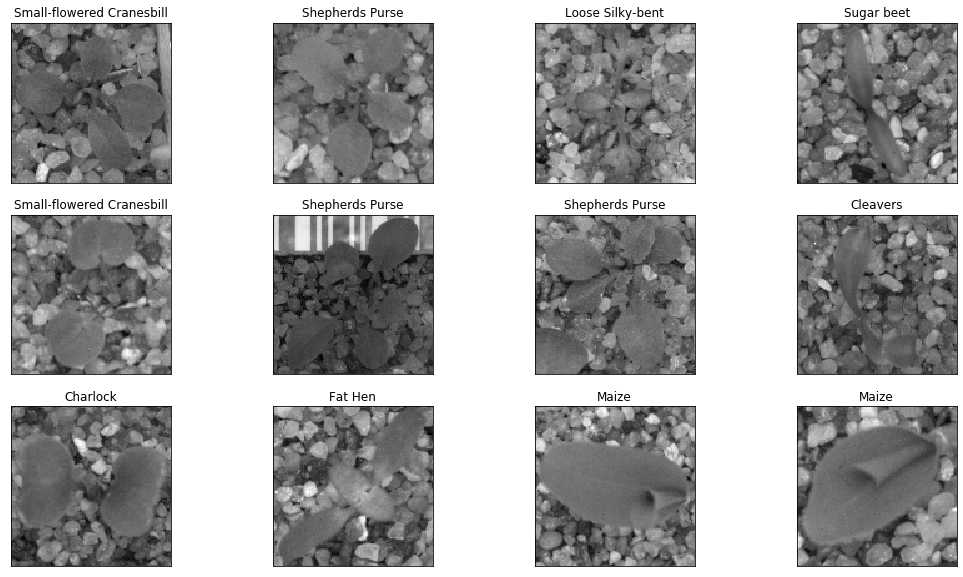

In [12]:
import matplotlib.pyplot as plt

test_data = create_test_data()
fig=plt.figure(figsize = (18,10))
for num,data in enumerate(test_data[:12]): 
    img_num = data[1]
    img_data = data[0]
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    model_out = model.predict([data])[0]
    str_label=label_return (model_out)
    y.imshow(orig,cmap='gray',interpolation='nearest')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()


In [13]:
import pandas as pd
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head(2)

,file,species
0,177d7e2a4.png,Fat Hen
1,8cfd98117.png,Loose Silky-bent


In [14]:
test_data = create_test_data()
with open('sample_submission.csv','w') as f:
    f.write('file,species\n')
    for data in test_data:
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
        model_out = model.predict([data])[0]
        str_label=label_return (model_out)
        file = img_num
        species = str_label
        row = file + "," + species + "\n"
        f.write(row)

100%|███████████████████████████████████████| 794/794 [00:03<00:00, 249.67it/s]


In [15]:
import pandas as pd
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head(10)

,file,species
0,b2706e2b3.png,Sugar beet
1,90d119d25.png,Loose Silky-bent
2,f4e7733d4.png,Small-flowered Cranesbill
3,da713c465.png,Loose Silky-bent
4,f445fe6fb.png,Small-flowered Cranesbill
5,da5255450.png,Cleavers
6,2dd5cfba9.png,Cleavers
7,ba3ce6b3e.png,Scentless Mayweed
8,239bdf640.png,Charlock
9,fea355851.png,Fat Hen


In [ ]:
#work done output written in CSV File 

In [28]:
!jupyter nbconvert --to html Project

[NbConvertApp] Converting notebook Project.ipynb to html
[NbConvertApp] Writing 746008 bytes to Project.html
